# Sample ROS Prov
###### This file was made manually just to create a sample model of the provenance info for ROS. The same concepts can then be used to model actual ROS programs

In [1]:
# Importing the required libraries
from prov.model import ProvDocument
import prov
import datetime

# For visualizations
from prov.dot import prov_to_dot
from IPython.display import Image

In [2]:
# First we create a Provenance data file
ros = ProvDocument()

In [3]:
# We can write name spaces here
ros.set_default_namespace('https://docs.ros.org/en/dashing/Installation.html')
ros.add_namespace('node', 'https://docs.ros.org/en/dashing/Tutorials/Understanding-ROS2-Nodes.html') # represents ros nodes
ros.add_namespace('topic', 'https://docs.ros.org/en/dashing/Tutorials/Topics/Understanding-ROS2-Topics.html') # represents ros topics
ros.add_namespace('msg', 'http://wiki.ros.org/msg') # represents ros messages
ros.add_namespace('activity', 'undefined') # represents the processes performed
ros.add_namespace('data_format', 'The format in which the data is stored/passed') # represents the processes performed

# Some more for future use
ros.add_namespace('module', 'python programs or groups') # represents collection of ros enities, may be in the form of a program
ros.add_namespace('user', 'agent editing/contributing to the program') # represents code contributors
ros.add_namespace('enduser', 'end user who interacts with the program') # this represents the end user and his interaction with the code

# Printing the prov so far
print(ros.get_provn())

document
  default <https://docs.ros.org/en/dashing/Installation.html>
  prefix node <https://docs.ros.org/en/dashing/Tutorials/Understanding-ROS2-Nodes.html>
  prefix topic <https://docs.ros.org/en/dashing/Tutorials/Topics/Understanding-ROS2-Topics.html>
  prefix msg <http://wiki.ros.org/msg>
  prefix activity <undefined>
  prefix data_format <The format in which the data is stored/passed>
  prefix module <python programs or groups>
  prefix user <agent editing/contributing to the program>
  prefix enduser <end user who interacts with the program>
  
endDocument


## Creating the elements of Prov (Entities, Agents and Activities/Processes)

### First we generate Nodes

In [4]:
# First we generate the nodes as agents
a = ros.agent('node:talker',\
         {'node:time_initialized':datetime.datetime.now(),\
          'node:param_use_sim_time':'False'})
ros.agent('node:listener',\
         {'node:time_initialized':datetime.datetime.now(),\
          'node:param_use_sim_time':'False'})
# ros.agent('node:/_ros2cli_daemon_0')

# Printing the prov so far
print(type(a))
# print(ros.get_provn())

<class 'prov.model.ProvAgent'>


In [5]:
# We then create the processes/activities related to each node and topic
# For instance, activity:node_Publish_to_topic or activity:node_Subscribe_to_topic

# Actvities related to node:talker
ac = ros.activity('activity:talker_Publish_to_chatter', datetime.datetime.now())
ros.activity('activity:talker_Publish_to_parameter_events', datetime.datetime.now())
ros.activity('activity:talker_Publish_to_rosout', datetime.datetime.now())

# Actvities related to node:listener
ros.activity('activity:listener_Subscribe_to_chatter', datetime.datetime.now())
ros.activity('activity:listener_Publish_to_parameter_events', datetime.datetime.now())
ros.activity('activity:listener_Publish_to_rosout', datetime.datetime.now())

# We also have to define the set ROS param activity for the nodes
ros.activity('activity:talker_set_param')
ros.activity('activity:listener_set_param')

# Printing the prov so far
print(ros.get_provn())

document
  default <https://docs.ros.org/en/dashing/Installation.html>
  prefix node <https://docs.ros.org/en/dashing/Tutorials/Understanding-ROS2-Nodes.html>
  prefix topic <https://docs.ros.org/en/dashing/Tutorials/Topics/Understanding-ROS2-Topics.html>
  prefix msg <http://wiki.ros.org/msg>
  prefix activity <undefined>
  prefix data_format <The format in which the data is stored/passed>
  prefix module <python programs or groups>
  prefix user <agent editing/contributing to the program>
  prefix enduser <end user who interacts with the program>
  
  agent(node:talker, [node:time_initialized="2021-08-12T21:27:07.243743" %% xsd:dateTime, node:param_use_sim_time="False"])
  agent(node:listener, [node:time_initialized="2021-08-12T21:27:07.243840" %% xsd:dateTime, node:param_use_sim_time="False"])
  activity(activity:talker_Publish_to_chatter, 2021-08-12T21:27:07.288247, -)
  activity(activity:talker_Publish_to_parameter_events, 2021-08-12T21:27:07.288330, -)
  activity(activity:talker_

In [6]:
# We then create the entities that are being used

# We begin with describing the topics being used
# The essential parameters which we'd like to define are: name, type/msg_format and time of initialization
e = ros.entity('topic:chatter',\
           other_attributes={'prov:label':'chatter',\
            'prov:time_initialized':datetime.datetime.now()})
ros.entity('topic:parameter_events',\
           {'prov:label':'parameter_events',\
            'prov:time_initialized':datetime.datetime.now()})
ros.entity('topic:rosout',\
           {'prov:label':'rosout',\
            'prov:time_initialized':datetime.datetime.now()})


# As the topics use a pre-defined data type, we could also make these data structures entities
ros.entity('msg:std_msgs/msg/String')
ros.entity('msg:rcl_interfaces/msg/ParameterEvent')
ros.entity('msg:rcl_interfaces/msg/Log')

# Then we describe the message being exchanged, we should note that the graphical view can become a bit clunky
# but we have to model messages as entities to ensure that we store the information, as for the point regarding
# readability, we can improve this later by query languages such as cypher which allow us to narrow down our
# vision to a specific portion of the visualized model by specifiying some constraints.

ros.entity('msg:message_1',\
           {'prov:topic':'/chatter',\
            'prov:type':'std_msgs/msg/String',\
            'prov:time_generated':datetime.datetime.now()})

# What if we declare an entity with the same name
# ros.entity('topic:chatter', {'prov:time_initialized':'00000253500000.00'})

# Printing the prov doc so far
print(ros.get_provn())

document
  default <https://docs.ros.org/en/dashing/Installation.html>
  prefix node <https://docs.ros.org/en/dashing/Tutorials/Understanding-ROS2-Nodes.html>
  prefix topic <https://docs.ros.org/en/dashing/Tutorials/Topics/Understanding-ROS2-Topics.html>
  prefix msg <http://wiki.ros.org/msg>
  prefix activity <undefined>
  prefix data_format <The format in which the data is stored/passed>
  prefix module <python programs or groups>
  prefix user <agent editing/contributing to the program>
  prefix enduser <end user who interacts with the program>
  
  agent(node:talker, [node:time_initialized="2021-08-12T21:27:07.243743" %% xsd:dateTime, node:param_use_sim_time="False"])
  agent(node:listener, [node:time_initialized="2021-08-12T21:27:07.243840" %% xsd:dateTime, node:param_use_sim_time="False"])
  activity(activity:talker_Publish_to_chatter, 2021-08-12T21:27:07.288247, -)
  activity(activity:talker_Publish_to_parameter_events, 2021-08-12T21:27:07.288330, -)
  activity(activity:talker_

### Drawing the Relations between 

In [7]:
# Finally we draw the relations between the nodes, topics, messages and activities

# First, we define the Generating Relations
# Node talker generated topic chatter and the other 2 nodes were generated by the cli
# ros.wasGeneratedBy('topic:chatter', 'node:talker')
# ros.wasGeneratedBy('topic:parameter_events', 'node:/_ros2cli_daemon_0')
# ros.wasGeneratedBy('topic:rosout', 'node:/_ros2cli_daemon_0')

# Next we define the relations for each topic/msg

# We begin with the topic Chatter
# Node "Talker" publishes to topic "Chatter" through the activity "talker_Publish_to_chatter"
ros.used('node:talker','activity:talker_Publish_to_chatter')
ros.wasInfluencedBy('topic:chatter', 'activity:talker_Publish_to_chatter')
# Node "Listener" listens to the chatter topic through the activity "listener_Subscribe_to_chatter"
ros.used('node:listener', 'activity:listener_Subscribe_to_chatter')
ros.wasInformedBy('activity:listener_Subscribe_to_chatter', 'topic:chatter')

# Topics borrow from pre-defined message types
ros.wasDerivedFrom('topic:chatter', 'msg:std_msgs/msg/String')
ros.wasDerivedFrom('topic:parameter_events', 'msg:rcl_interfaces/msg/ParameterEvent')
ros.wasDerivedFrom('topic:rosout', 'msg:rcl_interfaces/msg/Log')

# We then give the same relations for the messages
# Node "Talker" publishes the message "message_1"
ros.wasGeneratedBy('msg:message_1', 'activity:talker_Publish_to_chatter')
# ros.used('node:talker','activity:talker_Publish_to_chatter') # This has been commented as it is already present
# Node "Listener" listens to the message "message_1"
# ros.used('activity:listener_Subscribe_to_chatter','node:listener') # Relation already present
ros.used('activity:listener_Subscribe_to_chatter', 'msg:message_1')

<ProvUsage: (activity:listener_Subscribe_to_chatter, msg:message_1)>

In [8]:
# Defining the hidden relations

# Publishing to parameter_events
# talker
ros.used('node:talker','activity:talker_Publish_to_parameter_events')
ros.wasInfluencedBy('topic:parameter_events', 'activity:talker_Publish_to_parameter_events')
# ros.used('node:/_ros2cli_daemon_0','activity:Publish_to_parameter_events')
# listener
ros.used('node:listener','activity:listener_Publish_to_parameter_events')
ros.wasInfluencedBy('topic:parameter_events', 'activity:listener_Publish_to_parameter_events')

# Publishing to rosout
# talker
ros.used('node:talker','activity:talker_Publish_to_rosout')
ros.wasInfluencedBy('topic:rosout', 'activity:talker_Publish_to_rosout')
# listener
ros.used('node:listener','activity:listener_Publish_to_rosout')
ros.wasInfluencedBy('topic:rosout', 'activity:listener_Publish_to_rosout')

<ProvInfluence: (activity:listener_Publish_to_rosout, topic:rosout)>

In [9]:
# We also have to define the set relations, which change the ROS param of the nodes
# Talker
ros.wasInfluencedBy('node:talker', 'activity:talker_set_param')
ros.used('node:talker','activity:talker_set_param')
# Listener
ros.wasInfluencedBy('node:listener', 'activity:listener_set_param')
ros.used('node:listener','activity:listener_set_param')

<ProvUsage: (node:listener, activity:listener_set_param)>

### Visualizing the Prov Model

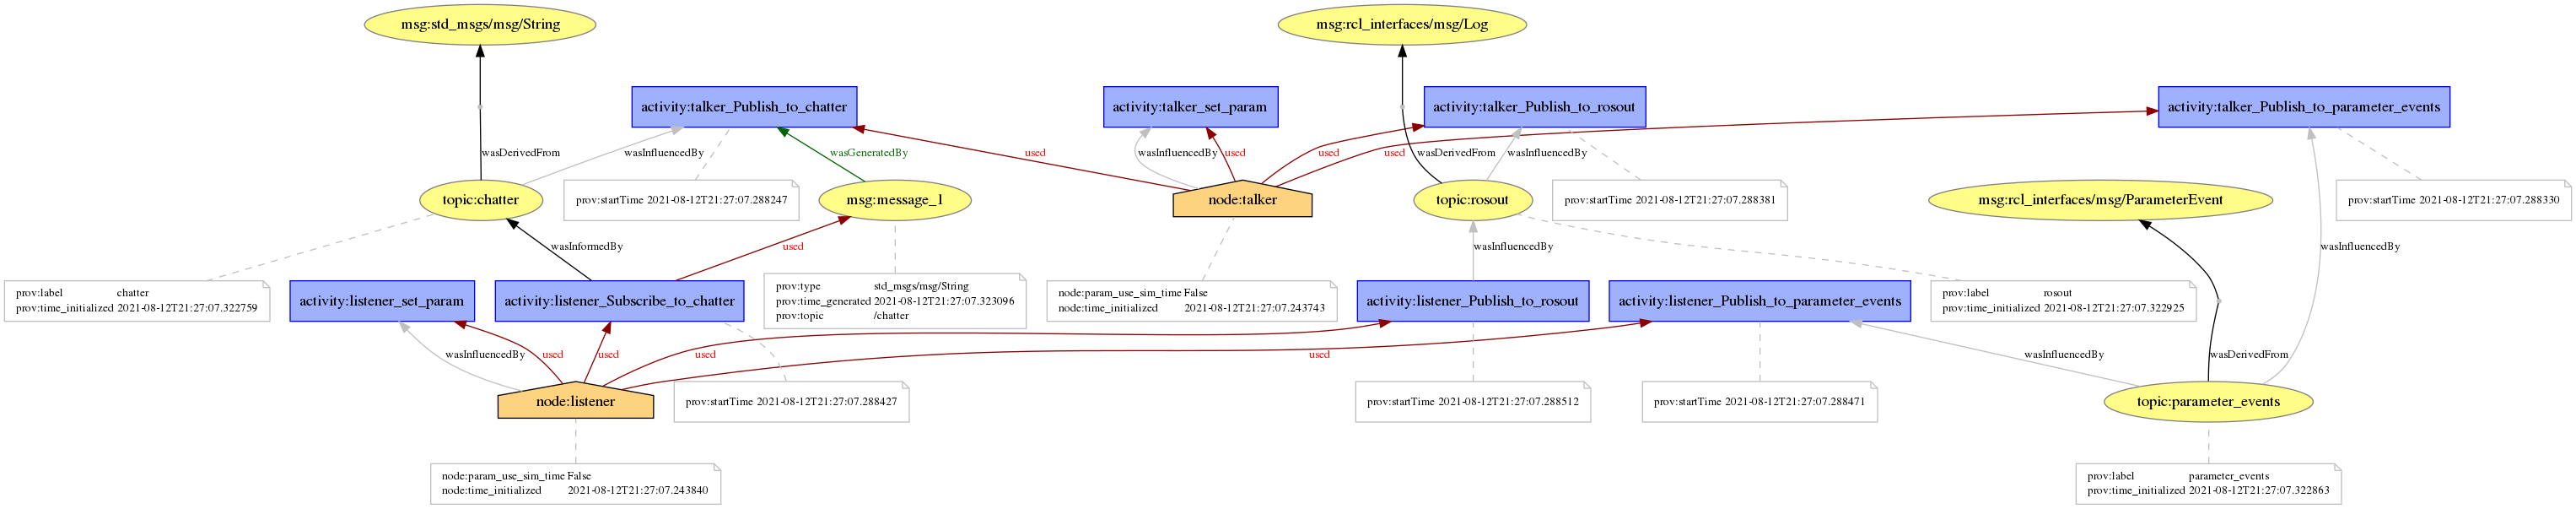

In [10]:
# visualize the graph
dot = prov_to_dot(ros)
dot.write_png('ros-prov.png')
Image('ros-prov.png')

## Seeing how it (the model) responds to different cases
## Basically the testing section

In [11]:
print(type(a))
print(type(ac))
print(type(e))
print(a)
# Check if it is a prov-relation
print(a.is_relation())
# Check if it is a prov-element
print(a.is_element())
# Listing all the attributes of a list
print(e.attributes)
print(e.extra_attributes)
print(e.formal_attributes)
# Attempting to extract the value of a particular attribute
print(e.get_attribute('prov:label'))
# Attempting to change the value of a particular attribute
print(e.bundle)
print(e._attributes)
print(e.value)
# Chaning the value of an attribute
e._attributes[e.bundle.valid_qualified_name('prov:label')] = ['test']

<class 'prov.model.ProvAgent'>
<class 'prov.model.ProvActivity'>
<class 'prov.model.ProvEntity'>
agent(node:talker, [node:time_initialized="2021-08-12T21:27:07.243743" %% xsd:dateTime, node:param_use_sim_time="False"])
False
True
[(<QualifiedName: prov:label>, 'chatter'), (<QualifiedName: prov:time_initialized>, datetime.datetime(2021, 8, 12, 21, 27, 7, 322759))]
[(<QualifiedName: prov:label>, 'chatter'), (<QualifiedName: prov:time_initialized>, datetime.datetime(2021, 8, 12, 21, 27, 7, 322759))]
()
{'chatter'}
<ProvDocument>
defaultdict(<class 'set'>, {<QualifiedName: prov:label>: {'chatter'}, <QualifiedName: prov:time_initialized>: {datetime.datetime(2021, 8, 12, 21, 27, 7, 322759)}})
set()


In [12]:
### Inserting a topic with the same name
# ros.agent('node:/_ros2cli_daemon_0')

In [13]:
# visualize the graph
# dot = prov_to_dot(ros)
# dot.write_png('ros-prov.png')
# Image('ros-prov.png')